In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
event_data = pd.read_csv("C:/Users/ACER/Downloads/User - Event Raw Dataset.csv")
event_description_data = pd.read_csv("C:/Users/ACER/Downloads/Event Description Mapping.csv")

In [3]:
event_data.head()


,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk


In [4]:
event_description_data.head()

,Event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General


In [5]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at_time  41177 non-null  object
 1   event            41177 non-null  object
 2   org_id           41177 non-null  object
 3   project_id       41036 non-null  object
 4   user_id          41177 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [6]:
event_description_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        17 non-null     object
 1   Description  17 non-null     object
 2   Section      17 non-null     object
dtypes: object(3)
memory usage: 536.0+ bytes


In [7]:
event_data.describe()

,created_at_time,event,org_id,project_id,user_id
count,41177,41177,41177,41036,41177
unique,36046,17,386,914,543
top,2022-03-03 18:55:17,material_profile_material_load,ORG546271885436,PRJ256203650640,USR509149973276
freq,4,10114,13318,12820,9594


In [8]:
event_description_data.describe()

,Event,Description,Section
count,17,17,17
unique,17,17,4
top,add_attendance_success,Successfully adding attendance of a person once,General
freq,1,1,7


In [9]:
event_description_data.rename(columns={'Event': 'event'}, inplace=True)
event_description_data.head()

,event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General


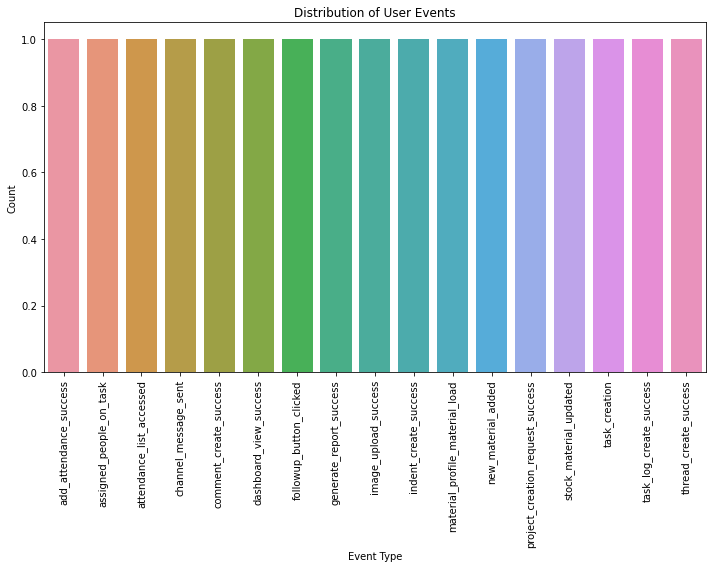

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x='event', data=event_description_data)
plt.title('Distribution of User Events')
plt.xlabel('Event Type')
plt.ylabel('Count')

# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.tight_layout() 
plt.show()

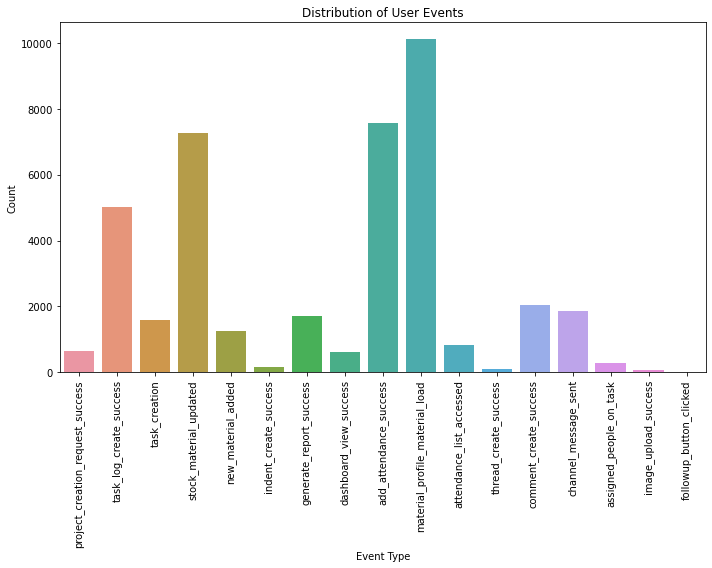

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x='event', data=event_data)
plt.title('Distribution of User Events')
plt.xlabel('Event Type')
plt.ylabel('Count')

# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.tight_layout() 
plt.show()

In [13]:
event_data['created_at_time'] = pd.to_datetime(event_data['created_at_time'])
event_data['date'] = event_data['created_at_time'].dt.date
event_date_counts = event_data['date'].value_counts().sort_index()
print(event_date_counts)

2022-01-01     4
2022-01-02     1
2022-01-03    56
2022-01-04    36
2022-01-05    83
              ..
2023-02-19    42
2023-02-20    34
2023-02-21    26
2023-02-22    35
2023-02-23    34
Name: date, Length: 415, dtype: int64


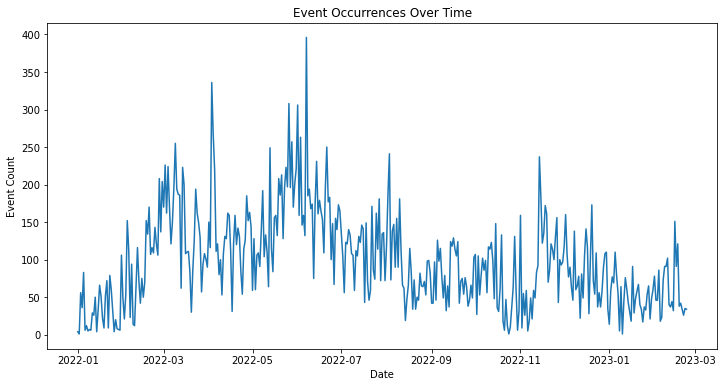

In [71]:
plt.figure(figsize=(12, 6))
event_date_counts.plot()
plt.title('Event Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.show()

In [72]:
user_event_counts = event_data.groupby('user_id')['event'].count()
project_event_counts = event_data.groupby('project_id')['event'].count()

# merging of dataset

In [15]:
merged_data = pd.merge(event_data, event_description_data, on='event', how='left')
merged_data

,created_at_time,event,org_id,project_id,user_id,date,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,Successfully creating a new project,General
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,Successfully creating an update on a particula...,Task
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,Successfully creating a task,Task
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,Successfully creating a new project,General
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,Successfully creating an update on a particula...,Task
...,...,...,...,...,...,...,...,...
41172,2022-04-07 08:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372,2022-04-07,Assigned another person on a particular task,Task
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372,2022-04-07,Assigned another person on a particular task,Task
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674,2022-04-12,Assigned another person on a particular task,Task
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645,2022-02-21,Successfully creating a task,Task


# user behaviour

In [17]:
user_behavior_patterns = merged_data.groupby('user_id')['event'].agg(lambda x: ','.join(x))

In [18]:
user_behavior_patterns

user_id
USR-dxj7tnl3dde                     project_creation_request_success
USR-r6ip6u098rf    task_log_create_success,task_log_create_succes...
USR-w9-buf-hzdi                     project_creation_request_success
USR001025373461    task_log_create_success,task_log_create_succes...
USR001462304016    task_log_create_success,task_log_create_succes...
                                         ...                        
USRz5vsgs2bkpzd                     project_creation_request_success
USRzhid5xfiufx2    task_log_create_success,task_creation,project_...
USRzlihmftjyxxj                     project_creation_request_success
USRzsrw0plmw1b9    task_log_create_success,task_creation,task_cre...
USRzw43egeq0ioy    task_log_create_success,task_creation,project_...
Name: event, Length: 543, dtype: object

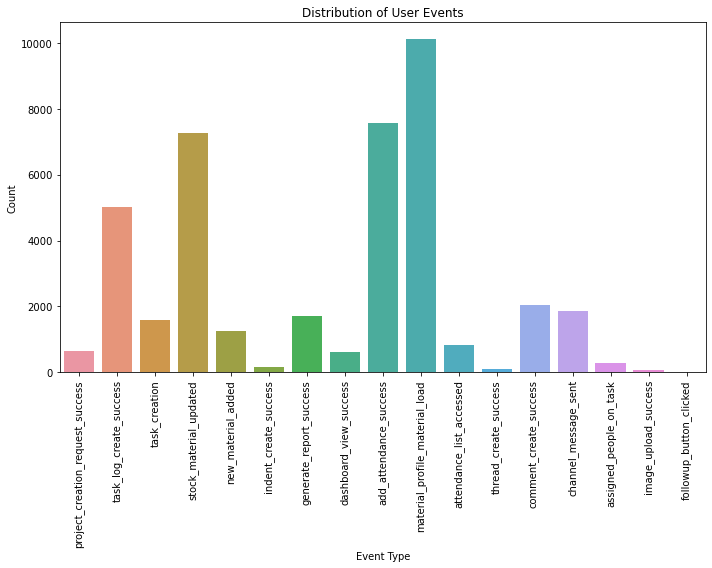

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(x='event', data=merged_data)
plt.title('Distribution of User Events')
plt.xlabel('Event Type')
plt.ylabel('Count')

# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.tight_layout() 
plt.show()

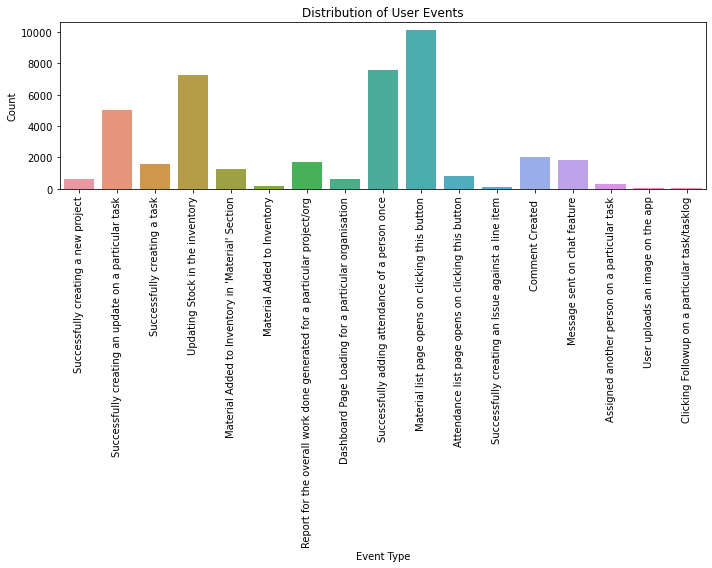

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Description', data=merged_data)
plt.title('Distribution of User Events')
plt.xlabel('Event Type')
plt.ylabel('Count')

# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.tight_layout() 
plt.show()

# patterns in event frequency

In [30]:
event_frequency = merged_data['event'].value_counts()
event_frequency

material_profile_material_load      10114
add_attendance_success               7569
stock_material_updated               7272
task_log_create_success              5010
comment_create_success               2054
channel_message_sent                 1867
generate_report_success              1701
task_creation                        1602
new_material_added                   1243
attendance_list_accessed              837
project_creation_request_success      651
dashboard_view_success                622
assigned_people_on_task               290
indent_create_success                 158
thread_create_success                  93
image_upload_success                   70
followup_button_clicked                24
Name: event, dtype: int64

# patterns in user engagement

In [48]:
user_event_counts = event_data.groupby('user_id')['event'].count()
sorted_user_event_counts = user_event_counts.sort_values(ascending=False)
top_engaged_users = sorted_user_event_counts.head(10)

In [49]:
top_engaged_users

user_id
USR509149973276    9594
USR395096428126    2608
USR659222931763    2029
USR594255074022    1308
USR660555701919    1280
USR658789223695    1176
USR120703039949    1149
USR912394666892    1139
USR181303348512     970
USRkiz6dyjgdxwh     967
Name: event, dtype: int64

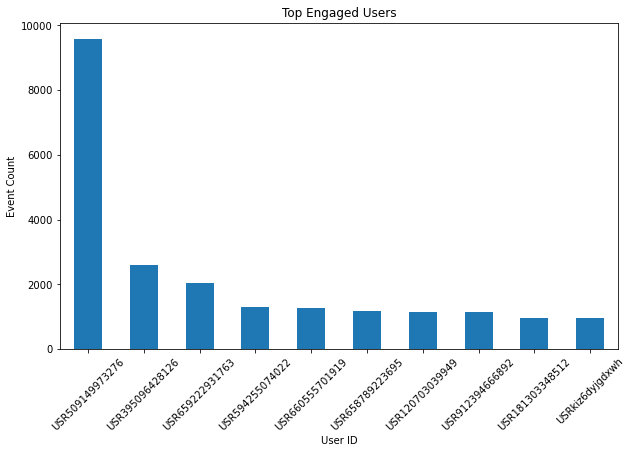

In [50]:
plt.figure(figsize=(10, 6))
top_engaged_users.plot(kind='bar')
plt.title('Top Engaged Users')
plt.xlabel('User ID')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()

# triggers and Activation Insights

In [65]:
subset_users = sorted_user_event_counts.head(100).index.tolist()
subset_event_data = event_data[event_data['user_id'].isin(subset_users)]
common_events_before_engagement = subset_event_data.groupby('user_id')['event'].apply(lambda x: x.value_counts().head(3))
common_events_before_engagement = common_events_before_engagement.reset_index()
print(common_events_before_engagement)

             user_id                         level_1  event
0    USR001025373461         task_log_create_success     18
1    USR001025373461          add_attendance_success     12
2    USR001025373461                   task_creation      7
3    USR001462304016         task_log_create_success    112
4    USR001462304016          add_attendance_success     57
..               ...                             ...    ...
290  USRwg8rwve88pl6  material_profile_material_load     37
291  USRwg8rwve88pl6         task_log_create_success      4
292  USRybq92a4syxqh          add_attendance_success     81
293  USRybq92a4syxqh                   task_creation      6
294  USRybq92a4syxqh         task_log_create_success      2

[295 rows x 3 columns]


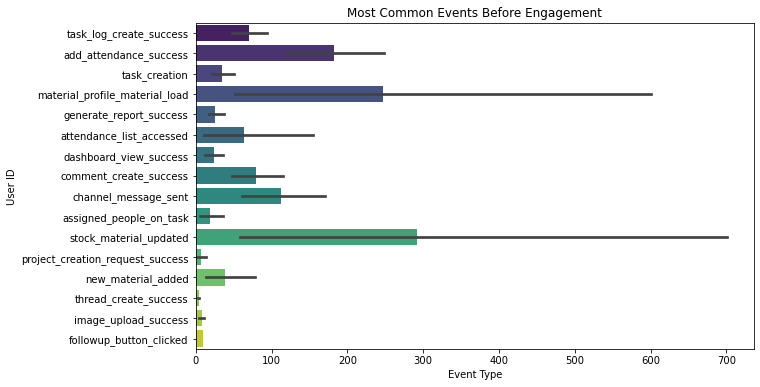

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='event', y='level_1', data=common_events_before_engagement, palette='viridis')
plt.title('Most Common Events Before Engagement')
plt.xlabel('Event Type')
plt.ylabel('User ID')
plt.show()